In [34]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import tweepy

auth = tweepy.OAuthHandler(conskey, conssec)
auth.set_access_token(acctoken, accsec)
api = tweepy.API(auth)

In [35]:
user = 'realDonaldTrump'
item = api.get_user(user)

In [36]:
from datetime import datetime, date, time, timedelta
account_created_date = item.created_at
print(account_created_date)

2009-03-18 13:46:38


In [59]:
statuses = Cursor(api.user_timeline, id=user,tweet_mode='extended',include_rts = False,count = 3000).items() 
userwrittentexts = []
for status in statuses:
  text = status.full_text
  userwrittentexts.append(text) 
print(len(userwrittentexts))

668


In [ ]:
import re 
cleanedtweets = []
for x in userwrittentexts: 
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', x)
    if len(text.strip()) == 0: 
      continue 
    else: 
      cleanedtweets.append(text.strip())
len(cleanedtweets)

In [74]:
from textgenrnn import textgenrnn
textgen = textgenrnn()
trainedmodel = textgen.train_on_texts(cleanedtweets, num_epochs=30,  gen_epochs=30)
textgen.generate_to_file("trumptweets.txt", n=100,temperature = .9)

Training on 90,778 character sequences.
Epoch 1/30
709/709 [==============================] - 82s 115ms/step - loss: 1.8795 - lr: 0.0040
Epoch 2/30
709/709 [==============================] - 86s 122ms/step - loss: 1.5438 - lr: 0.0039
Epoch 3/30
709/709 [==============================] - 96s 136ms/step - loss: 1.4434 - lr: 0.0037
Epoch 4/30
709/709 [==============================] - 96s 135ms/step - loss: 1.3140 - lr: 0.0036
Epoch 5/30
709/709 [==============================] - 96s 135ms/step - loss: 1.2349 - lr: 0.0035
Epoch 6/30
709/709 [==============================] - 93s 131ms/step - loss: 1.1782 - lr: 0.0033
Epoch 7/30
709/709 [==============================] - 87s 123ms/step - loss: 1.1374 - lr: 0.0032
Epoch 8/30
709/709 [==============================] - 88s 124ms/step - loss: 1.0979 - lr: 0.0031
Epoch 9/30
709/709 [==============================] - 91s 128ms/step - loss: 1.0556 - lr: 0.0029
Epoch 10/30
709/709 [==============================] - 85s 120ms/step - loss: 1.0149 - 


100%|██████████| 100/100 [04:29<00:00,  2.70s/it]


In [75]:
import nltk
from nltk.tokenize import word_tokenize
tokenized = []
for tweet in cleanedtweets: 
    tokenized_word = word_tokenize(tweet)
    tokenized.extend(tokenized_word)

In [76]:
from nltk.corpus import stopwords
import re
tokenized = [str(x).lower() for x in tokenized]
tokenized = [x for x in tokenized if x != "amp"]
tokenized = [re.sub(r'[^\w\s]','',x) for x in tokenized]
tokenized = [x for x in tokenized if len(x.strip()) > 0]
tokenizednew = []
stop_words=set(stopwords.words("english"))
textabbrev = ['u', 'ur', 'j', 'bc','w','_','-','im','rt','nt','get','got']
for x in tokenized: 
    if x not in stop_words and x not in textabbrev: 
        tokenizednew.append(x)
tokenized = tokenizednew

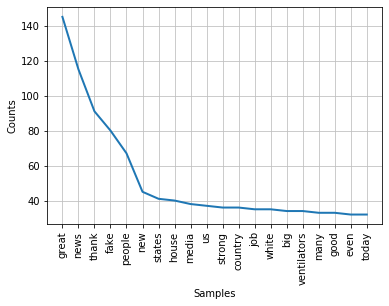

In [77]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized)
import matplotlib.pyplot as plt
fdist.plot(20,cumulative=False)
plt.show()

In [78]:
fdist.most_common(20)

[('great', 145),
 ('news', 115),
 ('thank', 91),
 ('fake', 80),
 ('people', 67),
 ('new', 45),
 ('states', 41),
 ('house', 40),
 ('media', 38),
 ('us', 37),
 ('strong', 36),
 ('country', 36),
 ('job', 35),
 ('white', 35),
 ('big', 34),
 ('ventilators', 34),
 ('many', 33),
 ('good', 33),
 ('even', 32),
 ('today', 32)]